<div align="center">


</div>

<h1 align="center">Predictive-Modeling-of-Health-Insurance-Costs</h1>

<div align="center">

---

</div>

<div align="right">
<b>Author. Gangasrinivas Katraji</b><br>
<a href="mailto:author@example.com">gangasrinivas27@gmail.com</a>
</div>

#### Activity-1. Importing all necessary libraries.


In [1]:
# Importing all necessary libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

####  Activity-2. Loading the dataset.

In [2]:
# 2.1. Loading the dataset.
df = pd.read_csv('https://raw.githubusercontent.com/GangasrinivasKatraji/Predictive-Modeling-of-Health-Insurance-Costs/main/Dataset/datasets_13720_18513_insurance(1).csv')

In [3]:
# 2.2. Displaying the first five rows of the dataset. 
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# 2.3. Finding STD.
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
# 2.4. Getting the info of the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
# 2.5. Finding the null values in the dataset.
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

#### Activity-3. Exploratory Data Analysis (EDA).

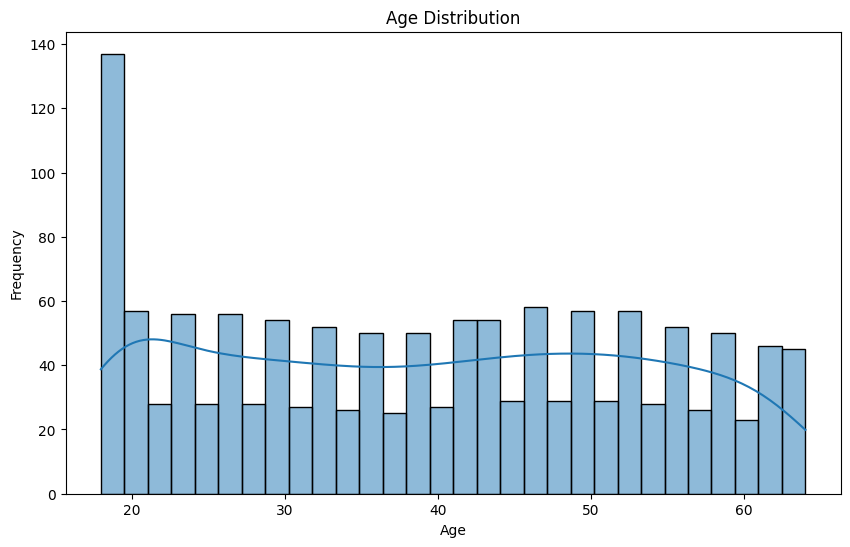

In [7]:
# Age Distribution.
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, bins=30)

# Setting labels and title.
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

# Displaying the plot.
plt.show()


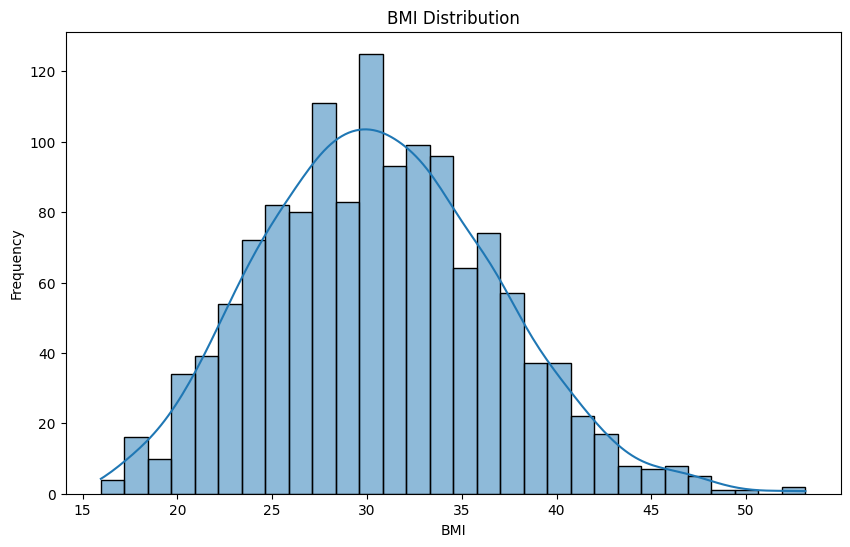

In [8]:
# BMI Distribution.
plt.figure(figsize=(10, 6))
sns.histplot(df['bmi'], kde=True, bins=30)

# Setting labels and title.
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')

# Displaying the plot.
plt.show()


C:\Users\carrefour\AppData\Local\Temp\ipykernel_5588\3694666171.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='smoker', y='charges', data=df, palette='coolwarm')


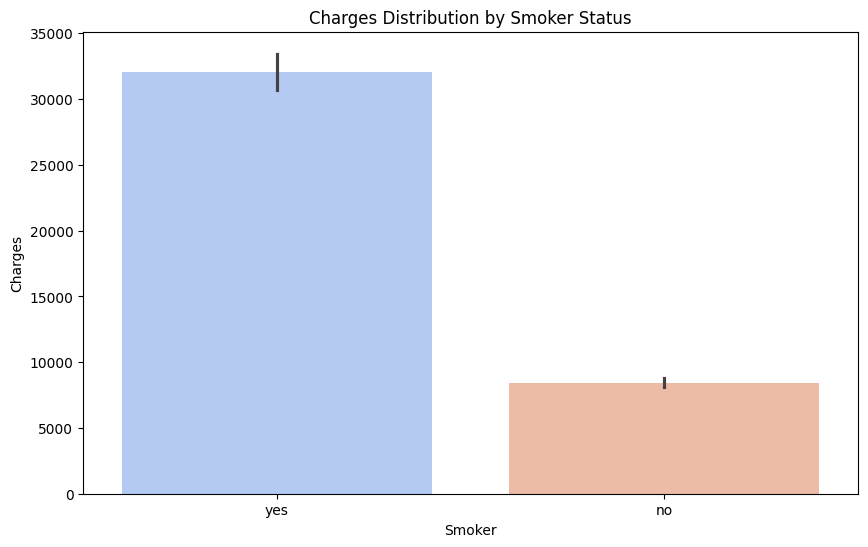

In [9]:
# Charges Distribution by Smoker Status.
plt.figure(figsize=(10, 6))
sns.barplot(x='smoker', y='charges', data=df, palette='coolwarm')

# Setting labels and title.
plt.title('Charges Distribution by Smoker Status')
plt.xlabel('Smoker')
plt.ylabel('Charges')

# Displaying the plot.
plt.show()


C:\Users\carrefour\AppData\Local\Temp\ipykernel_5588\1485590864.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region', y='charges', data=df, palette='Purples')


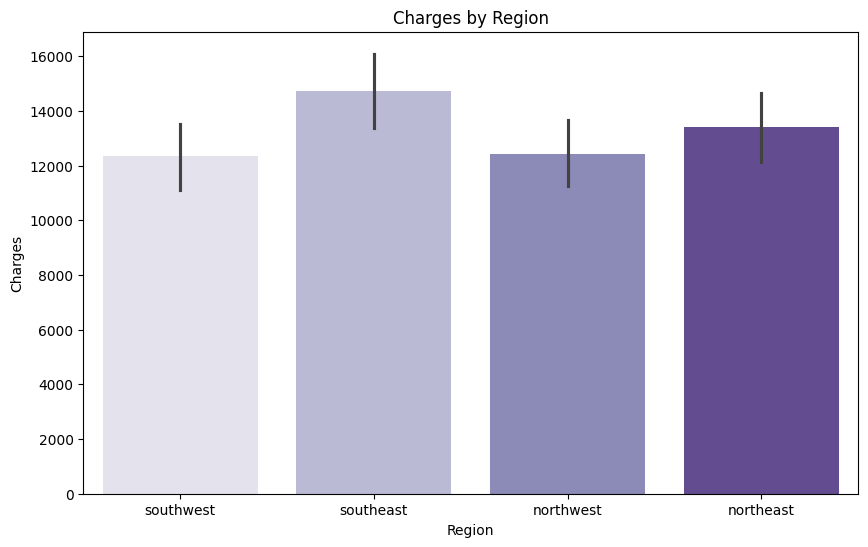

In [10]:
# Charges by Region.
plt.figure(figsize=(10, 6))
sns.barplot(x='region', y='charges', data=df, palette='Purples')

# Setting labels and title.
plt.title('Charges by Region')
plt.xlabel('Region')
plt.ylabel('Charges')

# Displaying the plot.
plt.show()


C:\Users\carrefour\AppData\Local\Temp\ipykernel_5588\2481347093.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='children', y='charges', data=df, palette='coolwarm')


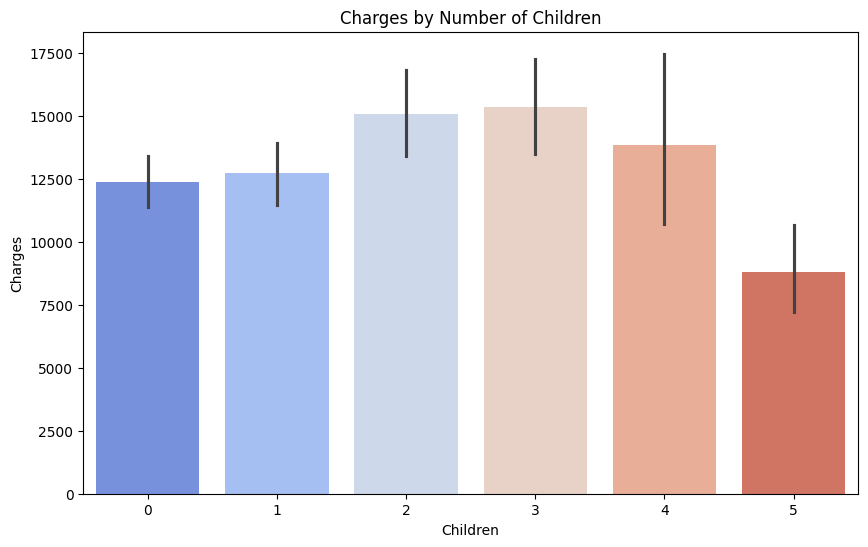

In [11]:
# Charges by Number of Children.
plt.figure(figsize=(10, 6))
sns.barplot(x='children', y='charges', data=df, palette='coolwarm')

# Setting labels and title.
plt.title('Charges by Number of Children')
plt.xlabel('Children')
plt.ylabel('Charges')

# Displaying the plot.
plt.show()


<Figure size 1500x1000 with 0 Axes>

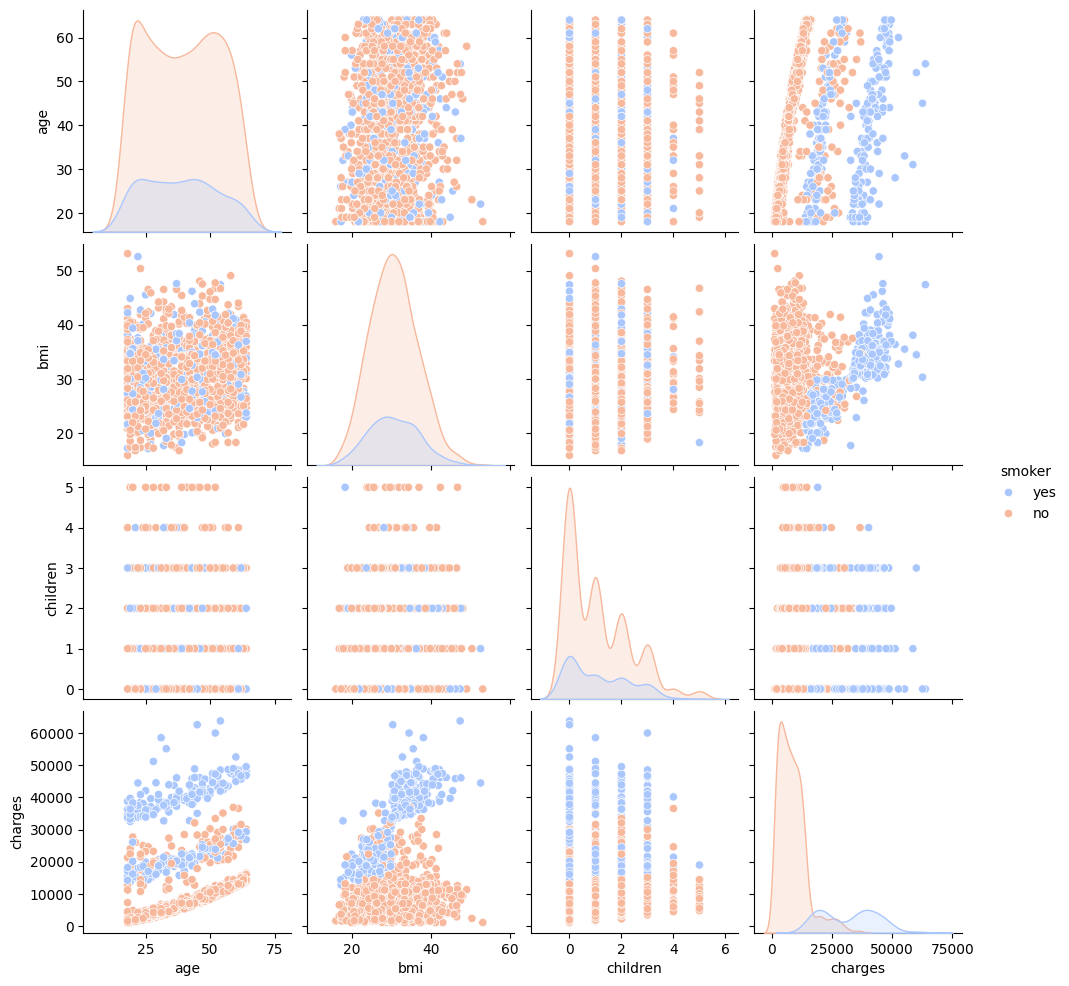

In [12]:
# Pairplot to see relationships between variables.
plt.figure(figsize=(15, 10))
sns.pairplot(df, hue='smoker', palette='coolwarm')

# Displaying the plot.
plt.show()


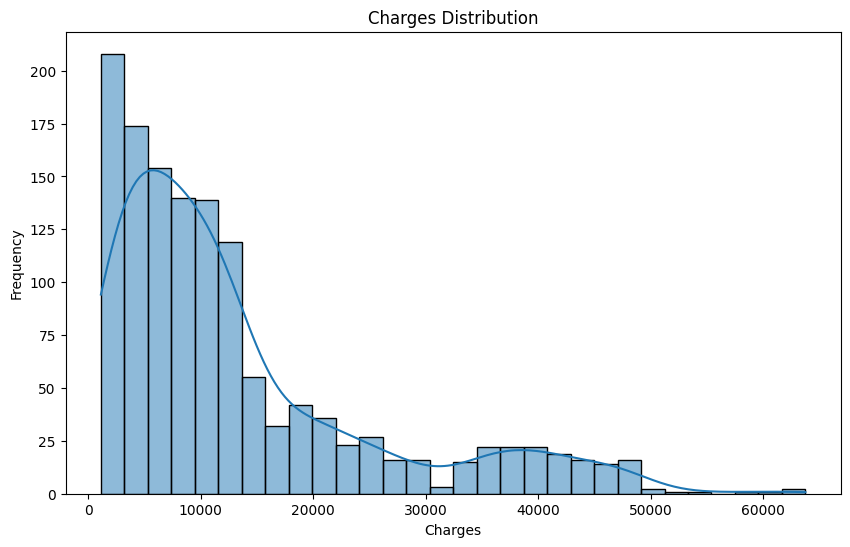

In [13]:
# Charges Distribution.
plt.figure(figsize=(10, 6))
sns.histplot(df['charges'], kde=True, bins=30)

# Setting labels and title.
plt.title('Charges Distribution')
plt.xlabel('Charges')
plt.ylabel('Frequency')

# Displaying the plot.
plt.show()


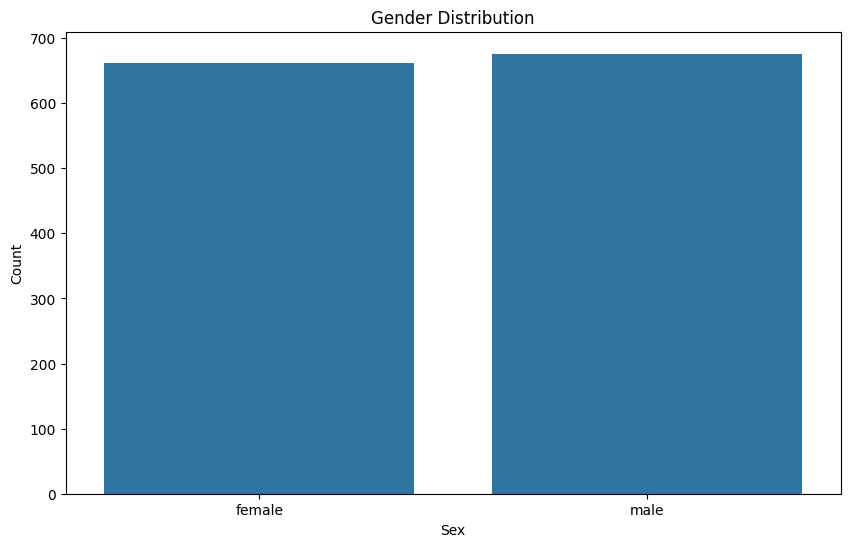

In [14]:
# Gender Distribution.
plt.figure(figsize=(10, 6))
sns.countplot(x='sex', data=df)

# Setting labels and title.
plt.title('Gender Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')

# Displaying the plot.
plt.show()


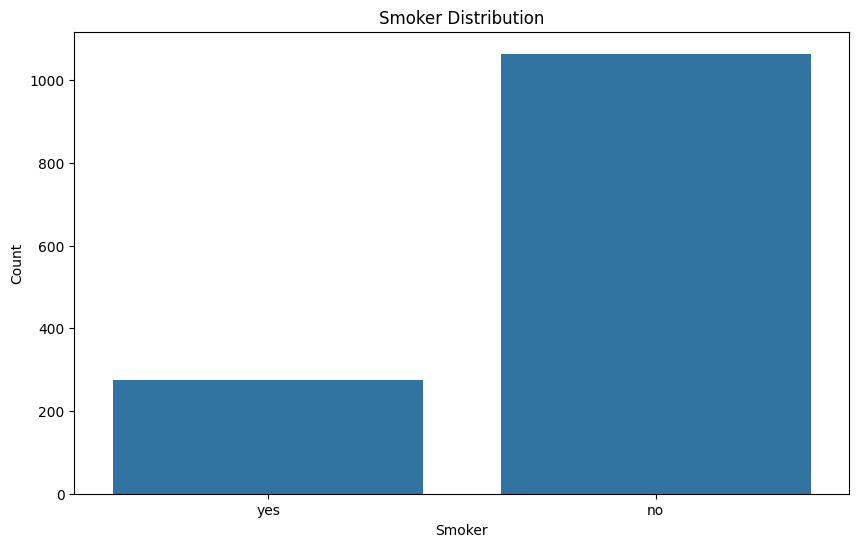

In [15]:
# Smoker Distribution.
plt.figure(figsize=(10, 6))
sns.countplot(x='smoker', data=df)

# Setting labels and title.
plt.title('Smoker Distribution')
plt.xlabel('Smoker')
plt.ylabel('Count')

# Displaying the plot.
plt.show()


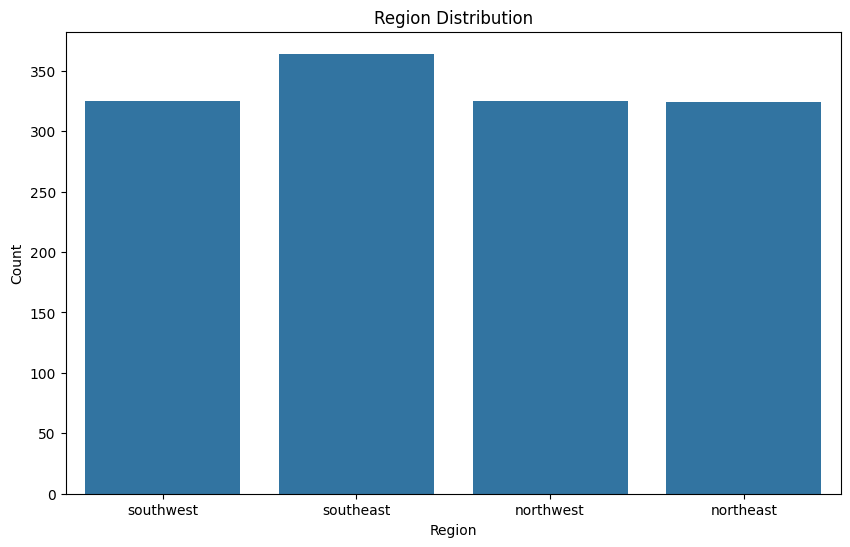

In [16]:
# Region Distribution.
plt.figure(figsize=(10, 6))
sns.countplot(x='region', data=df)

# Setting labels and title.
plt.title('Region Distribution')
plt.xlabel('Region')
plt.ylabel('Count')

# Displaying the plot.
plt.show()


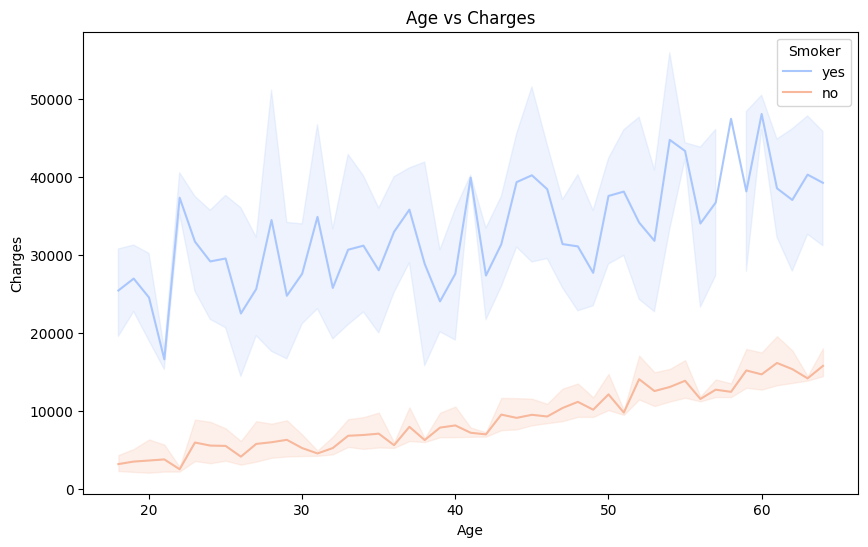

In [17]:
# Age vs Charges.
plt.figure(figsize=(10, 6))
sns.lineplot(x='age', y='charges', data=df, hue='smoker', palette='coolwarm')

# Setting labels and title.
plt.title('Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')

# Adding legend for smoker status.
plt.legend(title='Smoker')

# Displaying the plot.
plt.show()


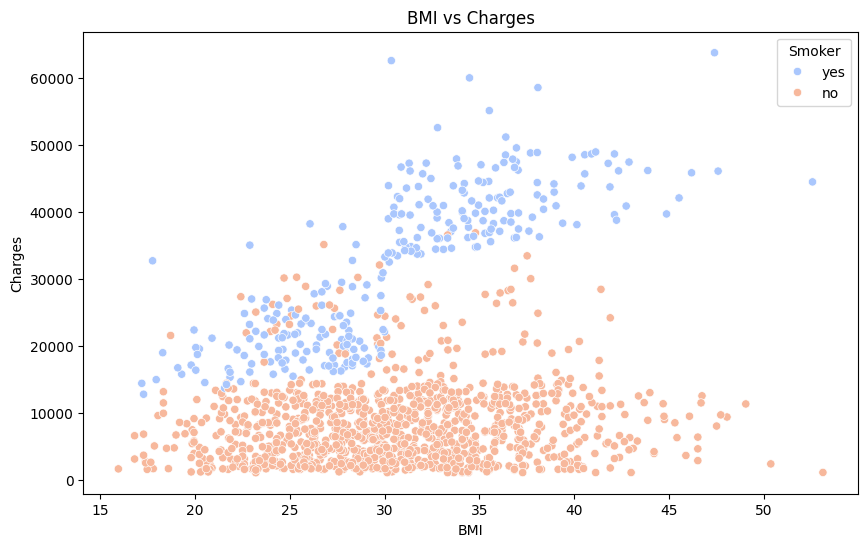

In [18]:
# BMI vs Charges.
plt.figure(figsize=(10, 6))
sns.scatterplot(x='bmi', y='charges', data=df, hue='smoker', palette='coolwarm')

# Setting labels and title.
plt.title('BMI vs Charges')
plt.xlabel('BMI')
plt.ylabel('Charges')

# Adding legend for smoker status.
plt.legend(title='Smoker')

# Displaying the plot.
plt.show()


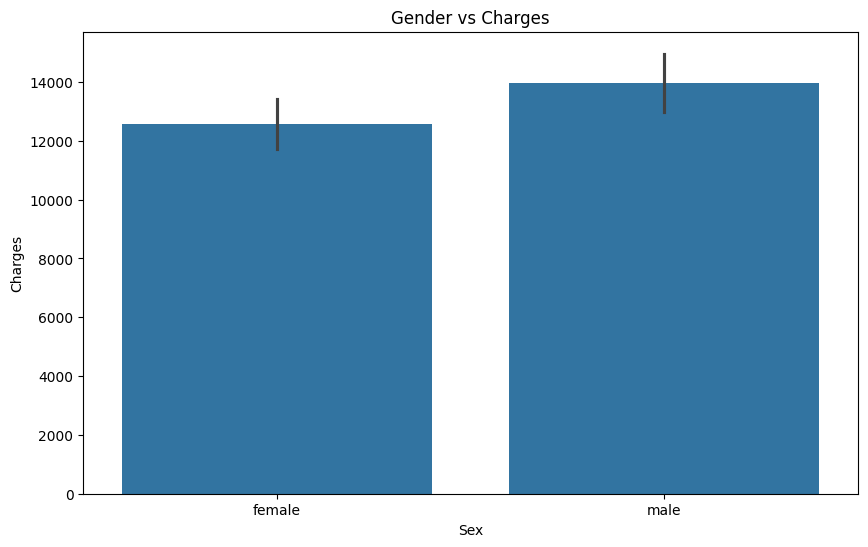

In [19]:
# Gender vs Charges.
plt.figure(figsize=(10, 6))
sns.barplot(x='sex', y='charges', data=df)

# Setting labels and title.
plt.title('Gender vs Charges')
plt.xlabel('Sex')
plt.ylabel('Charges')

# Displaying the plot.
plt.show()


#### Activity-4. Data Preparation and Encoding.

In [20]:
# Encoding categorical features using OneHotEncoder.
categorical_features = ['sex', 'smoker', 'region']
numerical_features = ['age', 'bmi', 'children']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),  # Scaling numerical features.
        ('cat', OneHotEncoder(), categorical_features)  # One-hot encoding categorical features.
    ])

In [21]:
# Splitting the data into training and testing sets.

# Input features.
X = df.drop(columns=['charges']) 

# Target variable.
y = df['charges']  

# 80-20 train-test split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  

#### Activity-5. Model Building & Model Evaluation.

#### 5.1. Linear Regression.

In [22]:
# Define preprocessing and model pipeline.
lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', LinearRegression())])

# Train the model.
lr_pipeline.fit(X_train, y_train)

# Predict on test set.
y_pred_lr = lr_pipeline.predict(X_test)

# Evaluate the model.
lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)


print("Linear Regression Metrics:")

# Mean Absolute Error.
print(f"MAE: {lr_mae:.2f}")

# Mean Squared Error.
print(f"MSE: {lr_mse:.2f}")

# R-squared Score.
print(f"R2 Score: {lr_r2:.2f}")


Linear Regression Metrics:
MAE: 4181.19
MSE: 33596915.85
R2 Score: 0.78


#### 5.2. Decision Tree Regressor.


In [23]:
# Define preprocessing and model pipeline
dt_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', DecisionTreeRegressor(random_state=42))])

# Train the model
dt_pipeline.fit(X_train, y_train)

# Predict on test set
y_pred_dt = dt_pipeline.predict(X_test)

# Evaluate the model
dt_mae = mean_absolute_error(y_test, y_pred_dt)
dt_mse = mean_squared_error(y_test, y_pred_dt)
dt_r2 = r2_score(y_test, y_pred_dt)

print("\nDecision Tree Regressor Metrics:")
print(f"MAE: {dt_mae:.2f}")
print(f"MSE: {dt_mse:.2f}")
print(f"R2 Score: {dt_r2:.2f}")



Decision Tree Regressor Metrics:
MAE: 2934.34
MSE: 37868754.09
R2 Score: 0.76


#### 5.3. Random Forest Regressor.


In [24]:
# Define preprocessing and model pipeline
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', RandomForestRegressor(random_state=42))])

# Train the model
rf_pipeline.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_pipeline.predict(X_test)

# Evaluate the model
rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Regressor Metrics:")
print(f"MAE: {rf_mae:.2f}")
print(f"MSE: {rf_mse:.2f}")
print(f"R2 Score: {rf_r2:.2f}")



Random Forest Regressor Metrics:
MAE: 2541.61
MSE: 21003637.61
R2 Score: 0.86


#### 5.4. Gradient Boosting Regressor.


In [25]:
# Define preprocessing and model pipeline
gb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', GradientBoostingRegressor(random_state=42))])

# Train the model
gb_pipeline.fit(X_train, y_train)

# Predict on test set
y_pred_gb = gb_pipeline.predict(X_test)

# Evaluate the model
gb_mae = mean_absolute_error(y_test, y_pred_gb)
gb_mse = mean_squared_error(y_test, y_pred_gb)
gb_r2 = r2_score(y_test, y_pred_gb)

print("\nGradient Boosting Regressor Metrics:")
print(f"MAE: {gb_mae:.2f}")
print(f"MSE: {gb_mse:.2f}")
print(f"R2 Score: {gb_r2:.2f}")



Gradient Boosting Regressor Metrics:
MAE: 2404.90
MSE: 18732863.28
R2 Score: 0.88


#### 5.5. Support Vector Machine (SVM) Regressor.


In [26]:
# Define preprocessing and model pipeline (including scaling for SVM)
svm_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('scaler', StandardScaler()),
                               ('regressor', SVR(kernel='linear'))])

# Train the model
svm_pipeline.fit(X_train, y_train)

# Predict on test set
y_pred_svm = svm_pipeline.predict(X_test)

# Evaluate the model
svm_mae = mean_absolute_error(y_test, y_pred_svm)
svm_mse = mean_squared_error(y_test, y_pred_svm)
svm_r2 = r2_score(y_test, y_pred_svm)

print("\nSupport Vector Machine (SVM) Regressor Metrics:")
print(f"MAE: {svm_mae:.2f}")
print(f"MSE: {svm_mse:.2f}")
print(f"R2 Score: {svm_r2:.2f}")



Support Vector Machine (SVM) Regressor Metrics:
MAE: 7763.73
MSE: 140347723.31
R2 Score: 0.10


#### 5.6. XGBoost Regressor.


In [27]:
# Define preprocessing and model pipeline
xgb_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', XGBRegressor(random_state=42))])

# Train the model
xgb_pipeline.fit(X_train, y_train)

# Predict on test set
y_pred_xgb = xgb_pipeline.predict(X_test)

# Evaluate the model
xgb_mae = mean_absolute_error(y_test, y_pred_xgb)
xgb_mse = mean_squared_error(y_test, y_pred_xgb)
xgb_r2 = r2_score(y_test, y_pred_xgb)

print("\nXGBoost Regressor Metrics:")
print(f"MAE: {xgb_mae:.2f}")
print(f"MSE: {xgb_mse:.2f}")
print(f"R2 Score: {xgb_r2:.2f}")



XGBoost Regressor Metrics:
MAE: 2604.33
MSE: 22454421.07
R2 Score: 0.86


#### Activity-6. Performance Comparison of Different Models


C:\Users\carrefour\AppData\Local\Temp\ipykernel_5588\525360309.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=results_df.index, y=results_df[metric], palette='Set2')


C:\Users\carrefour\AppData\Local\Temp\ipykernel_5588\525360309.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=results_df.index, y=results_df[metric], palette='Set2')
C:\Users\carrefour\AppData\Local\Temp\ipykernel_5588\525360309.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=results_df.index, y=results_df[metric], palette='Set2')


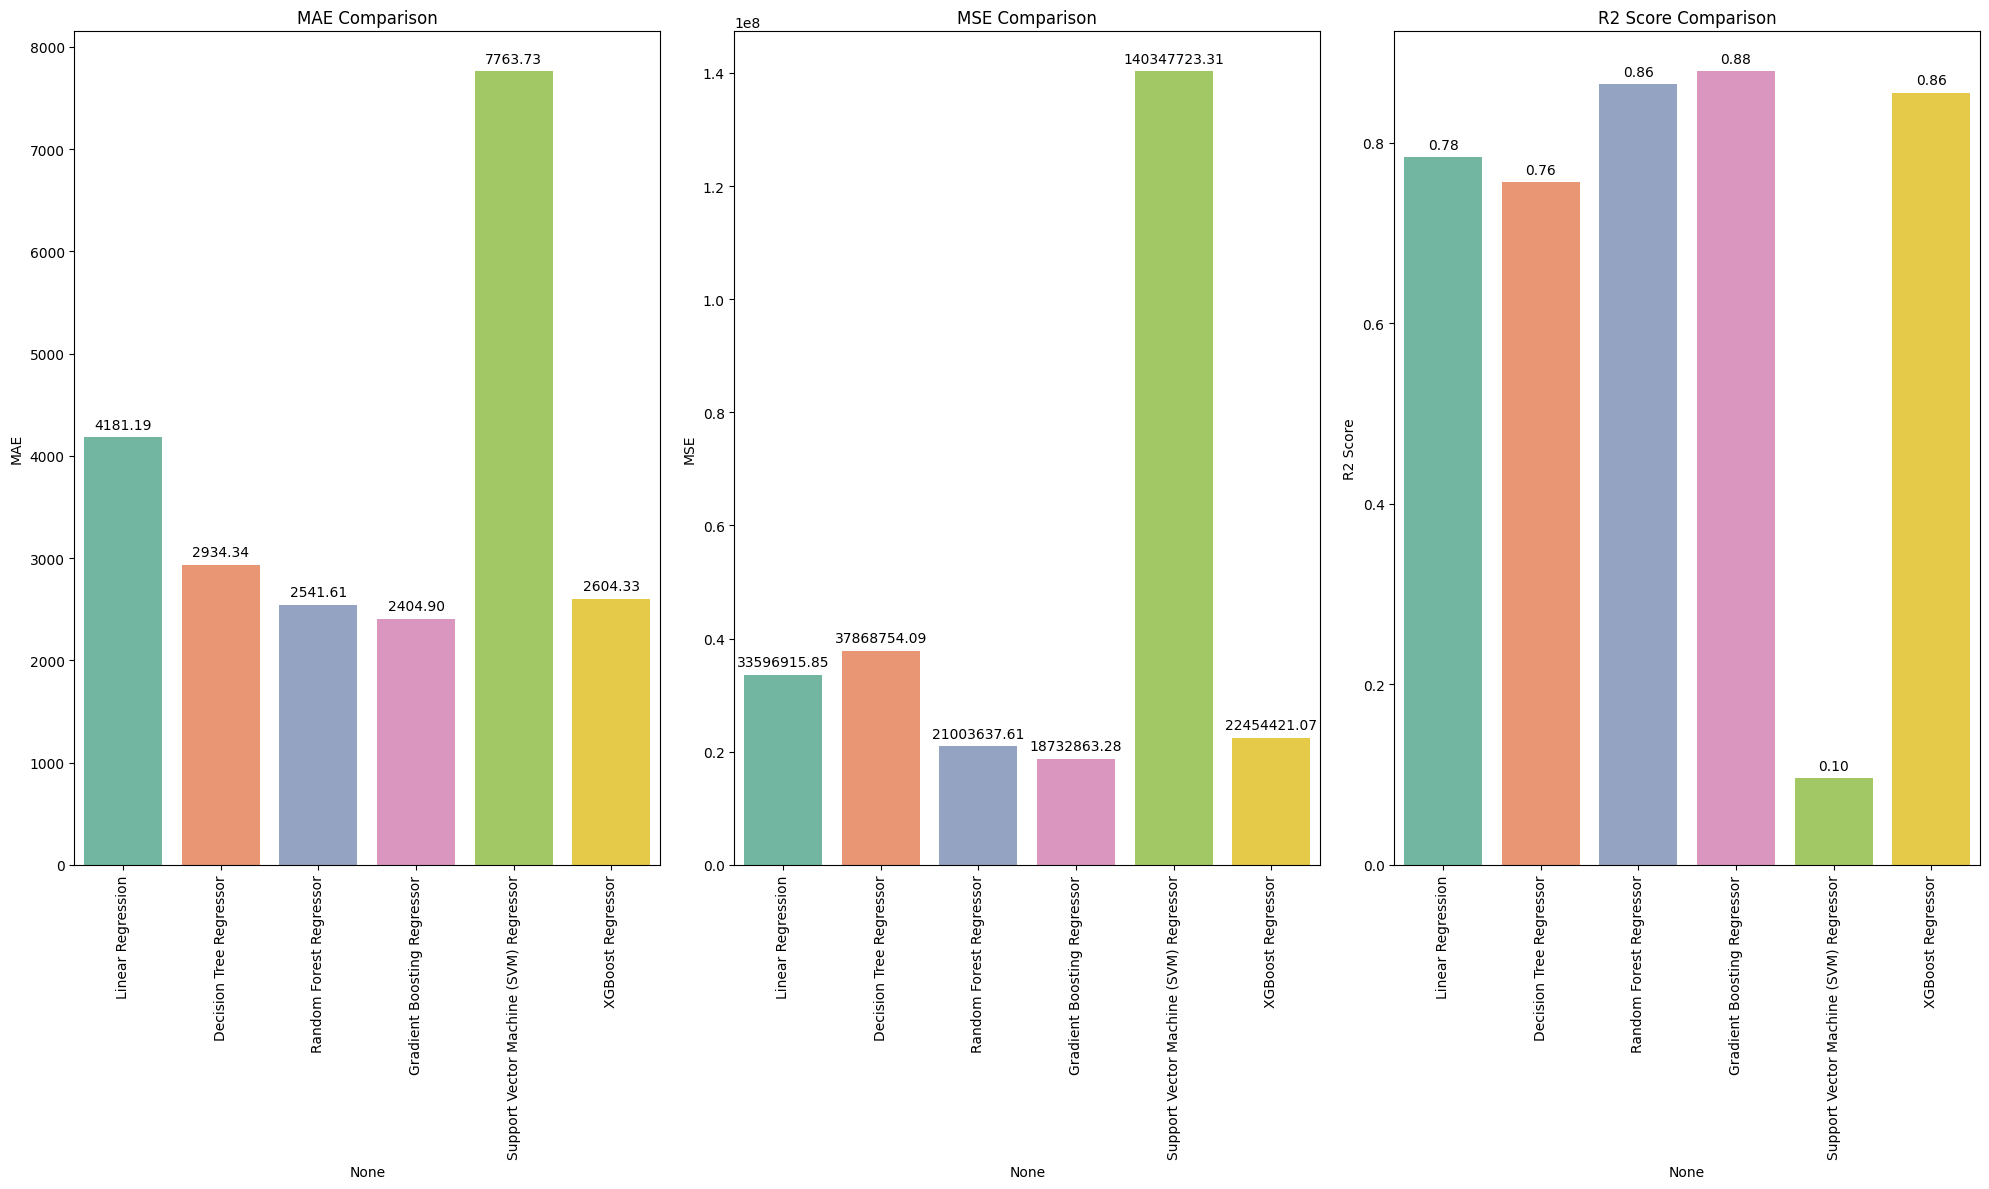

In [40]:
# Define results in a dictionary for easy access
results = {
    'Linear Regression': {'MAE': lr_mae, 'MSE': lr_mse, 'R2 Score': lr_r2},
    'Decision Tree Regressor': {'MAE': dt_mae, 'MSE': dt_mse, 'R2 Score': dt_r2},
    'Random Forest Regressor': {'MAE': rf_mae, 'MSE': rf_mse, 'R2 Score': rf_r2},
    'Gradient Boosting Regressor': {'MAE': gb_mae, 'MSE': gb_mse, 'R2 Score': gb_r2},
    'Support Vector Machine (SVM) Regressor': {'MAE': svm_mae, 'MSE': svm_mse, 'R2 Score': svm_r2},
    'XGBoost Regressor': {'MAE': xgb_mae, 'MSE': xgb_mse, 'R2 Score': xgb_r2}
}

# Convert the results dictionary into a DataFrame
results_df = pd.DataFrame(results).T

# Set up the matplotlib figure
plt.figure(figsize=(20, 12))

# Plot MAE, MSE, and R2 Score in separate subplots
metrics = ['MAE', 'MSE', 'R2 Score']

for i, metric in enumerate(metrics, 1):
    plt.subplot(1, 3, i)
    ax = sns.barplot(x=results_df.index, y=results_df[metric], palette='Set2')
    plt.title(f'{metric} Comparison')
    plt.ylabel(metric)
    plt.xticks(rotation=90)
    
    # Annotate bars with the model names
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, 9), 
                    textcoords='offset points')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


#### Performance Summary of Models

| Model                              | MAE      | MSE          | R2 Score |
|------------------------------------|----------|--------------|----------|
| Linear Regression                  | 4181.19  | 33596915.85  | 0.78     |
| Decision Tree Regressor            | 2934.34  | 37868754.09  | 0.76     |
| Random Forest Regressor            | 2541.61  | 21003637.61  | 0.86     |
| Gradient Boosting Regressor        | 2404.90  | 18732863.28  | 0.88     |
| Support Vector Machine (SVM) Regressor | 7763.73  | 140347723.31 | 0.10     |
| XGBoost Regressor                  | 2604.33  | 22454421.07  | 0.86     |


Based on the performance metrics of the models we've evaluated, the ***Gradient Boosting Regressor*** stands out as the best choice. Here's why:

- ***Lowest Mean Absolute Error (MAE):*** This model has the smallest average error in its predictions, with an MAE of 2404.90.

- ***Lowest Mean Squared Error (MSE):*** It also has the smallest squared errors, with an MSE of 18,732,863.28, which means its predictions are more consistently close to the actual values.

- ***Highest R2 Score:*** With an R2 score of 0.88, it explains the highest proportion of variance in the target variable compared to the other models.

Therefore, the ***Gradient Boosting Regressor*** is the best model among the ones you evaluated.






<div align="center">

---
</div>
<h1 align="center">Thank You</h1>

<div align="center">


</div>